### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [41]:
df = pd.read_csv('data/coupons.csv')

In [68]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,coupon_used
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar            

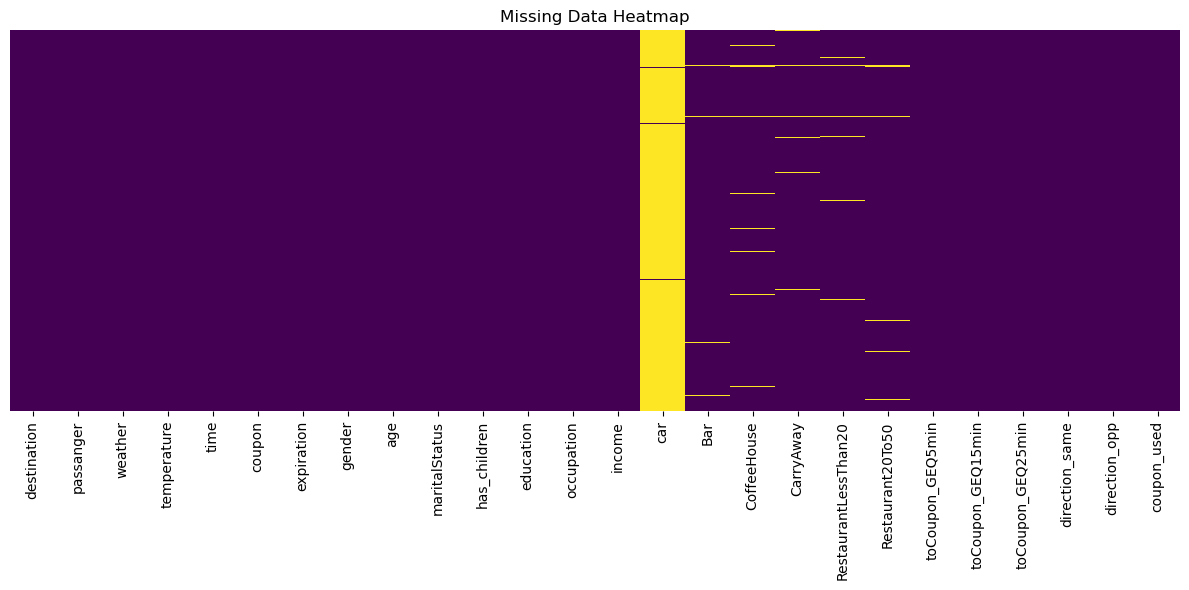

In [43]:
#Investigating and Handling Missing Data in coupons.csv
# 1. Investigate missing or problematic data in coupons.csv
# 2. Visualize missing data and Decide on an approach to handle missing data (drop or impute).

# Display basic information about the dataset
print("Dataset Information:")
print(df.info())

# Display the first few rows to get an initial sense of the data
print("\nDataset Preview:")
print(df.head())


# 1. Checking for Missing Data: Calculate the total number of missing values per column and their percentage relative to the dataset size.

# Calculate missing values for each column
missing_counts = df.isnull().sum()
missing_percent = (missing_counts / len(df)) * 100

# Combine into a DataFrame for better visualization
missing_df = pd.DataFrame({
    "Missing Count": missing_counts,
    "Missing Percentage": missing_percent
})
print("\nMissing Data Summary:")
print(missing_df)

plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Missing Data Heatmap")
plt.tight_layout()
plt.show()


3. Decide what to do about your missing data -- drop, replace, other...

In [45]:
# 3. Handling Missing Data
# Based on the missing data summary, we decide how to address missing values:
# Low Percentage Missing: If only a small percentage (e.g., < 5%) of values are missing in a column, we might fill (impute) those values. For numeric columns, a median imputation is often robust; for categorical columns, we can impute with the mode.
# High Percentage Missing: If a column has a very high percentage of missing data, it may be better to drop the column entirely.
# Row-wise Deletion: Alternatively, if only a few rows have missing data, and if they are not critical, we might drop those rows.
# ***STRATEGY***:
    # For numeric columns with missing values, fill missing entries with the median.
    # For categorical columns with missing values, fill missing entries with the mode.

# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()

# Replace missing values for numeric columns with median
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"Filled missing numeric values in '{col}' with median: {median_val}")

# Replace missing values for categorical columns with Mode
for col in categorical_cols:
    # Check if there are any missing values in the column
    if df[col].isnull().sum() > 0:
        # Compute the mode. This returns a Series.
        modes = df[col].mode()
        if not modes.empty:
            mode_val = modes.iloc[0]  # Use the first mode
            # Assign the filled column back to the DataFrame
            df[col] = df[col].fillna(mode_val)
            print(f"Filled missing categorical values in '{col}' with mode: {mode_val}")
        else:
            print(f"Column '{col}' has all missing values. Cannot impute mode.")


# Alternatively, if a column has too many missing values (e.g., >50%), you might drop it:
threshold = 50  # percentage threshold
cols_to_drop = missing_df[missing_df["Missing Percentage"] > threshold].index.tolist()
if cols_to_drop:
      df.drop(columns=cols_to_drop, inplace=True)
      print(f"Dropped columns with >{threshold}% missing values: {cols_to_drop}")

# 4. Final Check
# Verify that the missing values have been handled appropriately.

print("\nMissing Data After Imputation:")
print(df.isnull().sum())


Filled missing categorical values in 'car' with mode: Mazda5
Filled missing categorical values in 'Bar' with mode: never
Filled missing categorical values in 'CoffeeHouse' with mode: less1
Filled missing categorical values in 'CarryAway' with mode: 1~3
Filled missing categorical values in 'RestaurantLessThan20' with mode: 1~3
Filled missing categorical values in 'Restaurant20To50' with mode: less1
Dropped columns with >50% missing values: ['car']

Missing Data After Imputation:
destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min       

4. What proportion of the total observations chose to accept the coupon?



In [47]:
# Calculate the number of accepted coupons
#***NOTE: Renamed Columnn 'Y' to 'coupon_used' in coupons.csv***
accepted_count = df['coupon_used'].sum()  # Sum will work if accepted=1, rejected=0

# Calculate the total number of observations
total_count = len(df)

# Compute the proportion
proportion_accepted = accepted_count / total_count

print("Total observations:", total_count)
print("Number of accepted coupons:", accepted_count)
print("Proportion of observations that accepted the coupon: {:.2%}".format(proportion_accepted))

Total observations: 12684
Number of accepted coupons: 7210
Proportion of observations that accepted the coupon: 56.84%


5. Use a bar plot to visualize the `coupon` column.

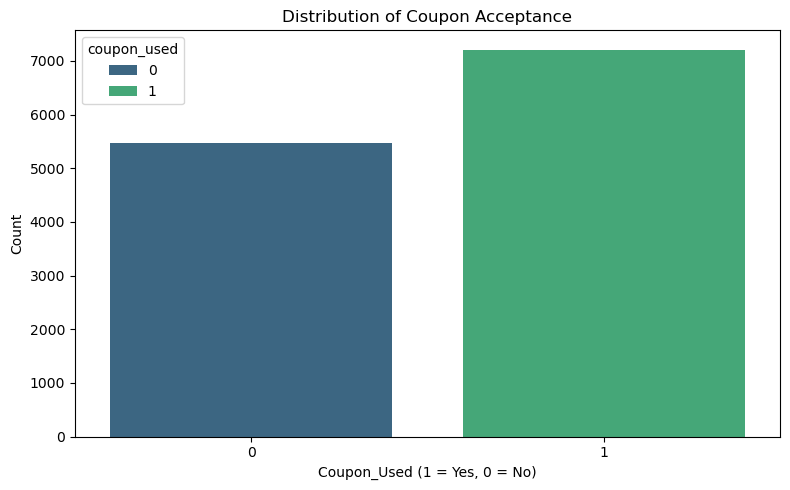

In [49]:
# 5. Visualize the coupon column.Set the figure size for readability
#Renamed Columnn 'Y' to 'coupon_used' in coupons.csv***
    
plt.figure(figsize=(8, 5))

# Create a bar plot showing the count of each coupon acceptance category
sns.countplot(x="coupon_used", data=df, hue= "coupon_used", palette="viridis")

# Add labels and a title
plt.xlabel("Coupon_Used (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.title("Distribution of Coupon Acceptance")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

6. Use a histogram to visualize the temperature column.

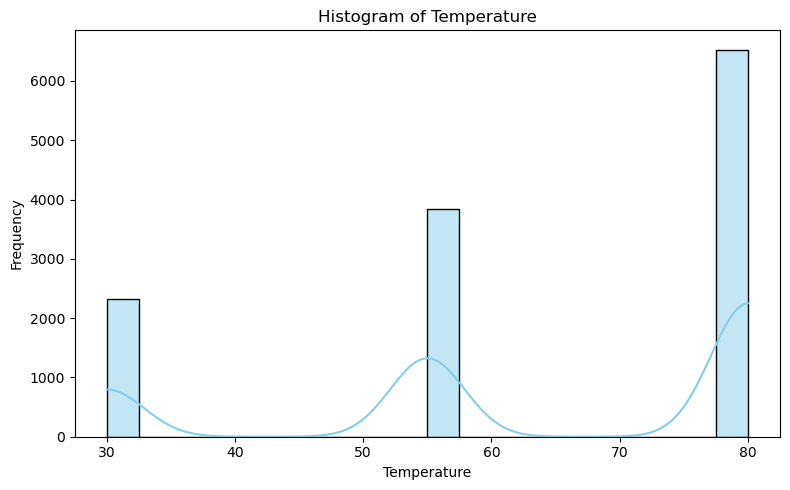

In [51]:
# 6. Visualize Tem Column via Histogram. 
#Set the figure size for readability
plt.figure(figsize=(8, 5))

# Create a histogram for the 'temperature' column
sns.histplot(data=df, x="temperature", kde=True, color="skyblue", bins=20)

# Add labels and a title
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Histogram of Temperature")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [53]:
# Investigate Bar Coupons
#Create a new DataFrame for only bar coupons
df_bar_coupons = df[df['coupon'] == "Bar"].copy()

# Verify the number of rows in the new DataFrame
print("Number of Bar Coupon records:", df_bar_coupons.shape[0])

Number of Bar Coupon records: 2017


2. What proportion of bar coupons were accepted?


In [55]:
# Calculate the number of accepted bar coupons (assuming accepted=1)
#***NOTE: Rename ColumnN 'Y' to 'coupon_used' in coupons.csv***
accepted_bar_coupon_count = df_bar_coupons['coupon_used'].sum()

# Calculate the total number of bar coupon observations
total_bar_coupon_count = len(df_bar_coupons)

# Compute the proportion of bar coupons that were accepted
proportion_bar_coupon_accepted = accepted_bar_coupon_count / total_bar_coupon_count

print("Total Bar Coupons:", total_bar_coupon_count)
print("Number of Accepted Bar Coupons:", accepted_bar_coupon_count)
print("Proportion of Bar Coupons Accepted: {:.2%}".format(proportion_bar_coupon_accepted))

Total Bar Coupons: 2017
Number of Accepted Bar Coupons: 827
Proportion of Bar Coupons Accepted: 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


Acceptance rate for customers visiting a bar 3 or fewer times per month: 62.19%
Acceptance rate for customers visiting a bar more than 3 times per month: 63.75%


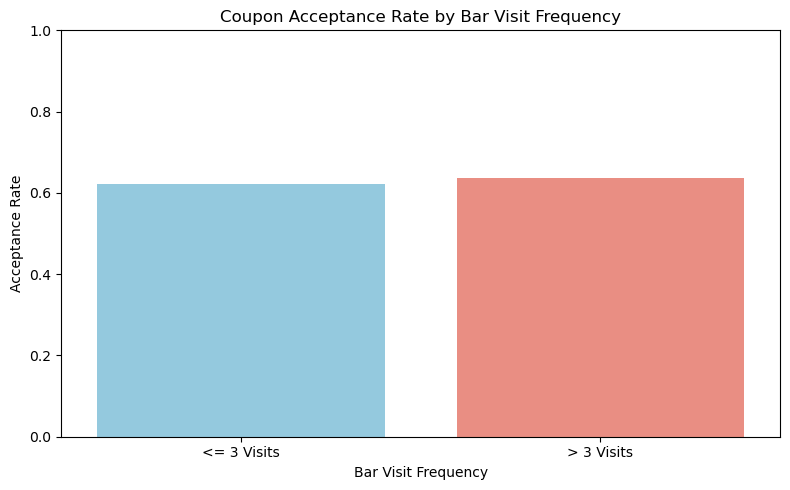

In [57]:
# Define two groups based on bar visit frequency. Bar column has values"1~3", "4~8", "gt8", "less1", "never"
low_bar_visitors = df[df["Bar"]==("1~3" or "less1")]
high_bar_visitors = df[df["Bar"]==("4~8" or "gt8")]

# Calculate the acceptance rate using the mean of the coupon accepted indicator (0 or 1), assuming colum "Y" in coupons.csv is coupon accepted indicator
low_bar_acceptance_rate = low_bar_visitors["coupon_used"].mean()
high_bar_acceptance_rate = high_bar_visitors["coupon_used"].mean()

print("Acceptance rate for customers visiting a bar 3 or fewer times per month: {:.2%}".format(low_bar_acceptance_rate))
print("Acceptance rate for customers visiting a bar more than 3 times per month: {:.2%}".format(high_bar_acceptance_rate))

# Visualize the comparison with a bar plot
groups = ['<= 3 Visits', '> 3 Visits']
rates = [low_bar_acceptance_rate, high_bar_acceptance_rate]

plt.figure(figsize=(8, 5))
sns.barplot(x=groups, y=rates, hue=groups, palette=["skyblue", "salmon"])
plt.ylabel("Acceptance Rate")
plt.xlabel("Bar Visit Frequency")
plt.title("Coupon Acceptance Rate by Bar Visit Frequency")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


Acceptance rate for drivers (>1 bar/month and >25): 62.15%
Acceptance rate for all others: 61.62%


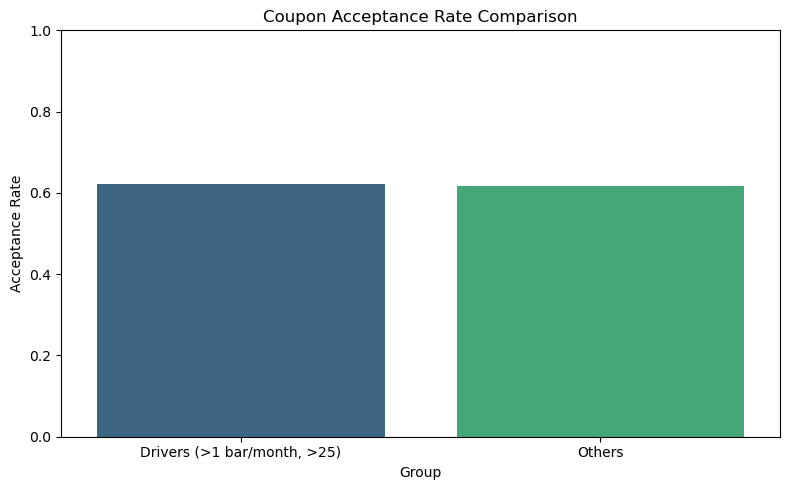

In [59]:
# Define two groups based on bar visit frequency. 
#Age column has values 21, 26, 31, 36, 41, 46, 50plus, and below21 and Bar column has values"1~3", "4~8", "gt8", "less1", "never"
#***NOTE: Renamed Columnn 'Y' to 'coupon_used' in coupons.csv***

group1_25andover_visitingbarmorethanonce = df[(df["Bar"].isin(["1~3", "4~8", "gt8"]) & (df["age"].isin(["26","31", "36", "41", "46", "50plus"])))]

# Group 2: All other drivers going to Bar more than once and are less than 25 years of Age
group2_AllAges_visitingbar = df[(df["Bar"] !="never") & (df["age"] == "21")]

# Calculate the acceptance rate using the mean of the coupon accepted indicator (0 or 1), assuming colum "Y" in coupons.csv is coupon accepted indicator
acceptancerate_group1_25andover_visitingbarmorethanonce = group1_25andover_visitingbarmorethanonce["coupon_used"].mean()
acceptancerate_group2_AllAges_visitingbar = group2_AllAges_visitingbar["coupon_used"].mean()



print("Acceptance rate for drivers (>1 bar/month and >25): {:.2%}".format(acceptancerate_group1_25andover_visitingbarmorethanonce))
print("Acceptance rate for all others: {:.2%}".format(acceptancerate_group2_AllAges_visitingbar))

# Optional: Visualize the comparison with a bar plot
rates_df = pd.DataFrame({
    "Group": ["Drivers (>1 bar/month, >25)", "Others"],
    "Acceptance Rate": [acceptancerate_group1_25andover_visitingbarmorethanonce, acceptancerate_group2_AllAges_visitingbar]
})

plt.figure(figsize=(8, 5))
sns.barplot(x="Group", y="Acceptance Rate", hue= "Group", data=rates_df, palette="viridis")
plt.title("Coupon Acceptance Rate Comparison")
plt.ylabel("Acceptance Rate")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


Acceptance rate for Group 1 (Drivers >1 bar/month, non-kid passenger, non-agri occupation): 75.00%
Acceptance rate for Group 2 (All others): 59.80%


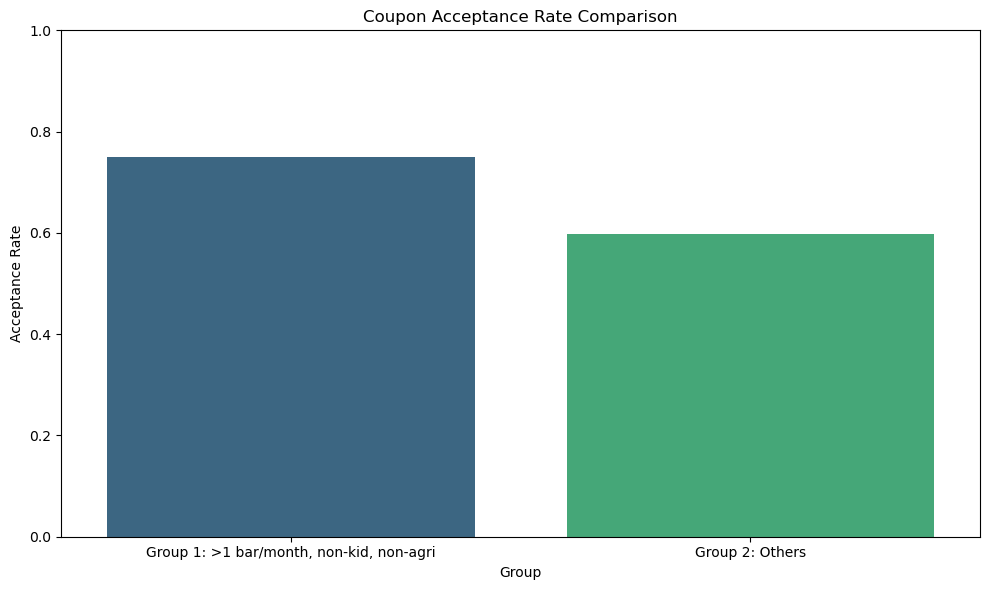

In [61]:
# Define Group 1 conditions:
#  More than 1 bar visit per month and Passenger type is not "Kid" and Occupation is not in ["Farming Fishing & Forestry"]
#***NOTE: Renamed Columnn 'Y' to 'coupon_used' in coupons.csv***

group1_pbm5 = (df[(df["Bar"]!="never") & (df["age"] != ("below21"))& (df["passanger"] != "Kid(s)") & (df["occupation"].isin(["Farming Fishing & Forestry"]))])
group2_pbm5 = (df[(df["Bar"]!="never")  & (df["passanger"] != "Kid(s)") & (df["occupation"]!= "Farming Fishing & Forestry")])


# Calculate the acceptance rate using the mean of the coupon accepted indicator (0 or 1), assuming colum "Y" in coupons.csv is coupon accepted indicator
acceptance_rate_pbm5_group1 = group1_pbm5["coupon_used"].mean()
acceptance_rate_pbm5_group2 = group2_pbm5["coupon_used"].mean()

print("Acceptance rate for Group 1 (Drivers >1 bar/month, non-kid passenger, non-agri occupation): {:.2%}".format(acceptance_rate_pbm5_group1))
print("Acceptance rate for Group 2 (All others): {:.2%}".format(acceptance_rate_pbm5_group2))

# Optional: Visualize the comparison with a bar plot.
rates_df = pd.DataFrame({
    "Group": ["Group 1: >1 bar/month, non-kid, non-agri", "Group 2: Others"],
    "Acceptance Rate": [acceptance_rate_pbm5_group1, acceptance_rate_pbm5_group2]
})

plt.figure(figsize=(10, 6))
sns.barplot(x="Group", y="Acceptance Rate", hue="Group", data=rates_df, palette="viridis")
plt.title("Coupon Acceptance Rate Comparison")
plt.ylabel("Acceptance Rate")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()







6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



Master DataFrame shape: (12684, 25)
Subset DataFrame shape: (8830, 25)
New DataFrame shape: (3854, 25)
0.6045300113250283
0.5552672548002076


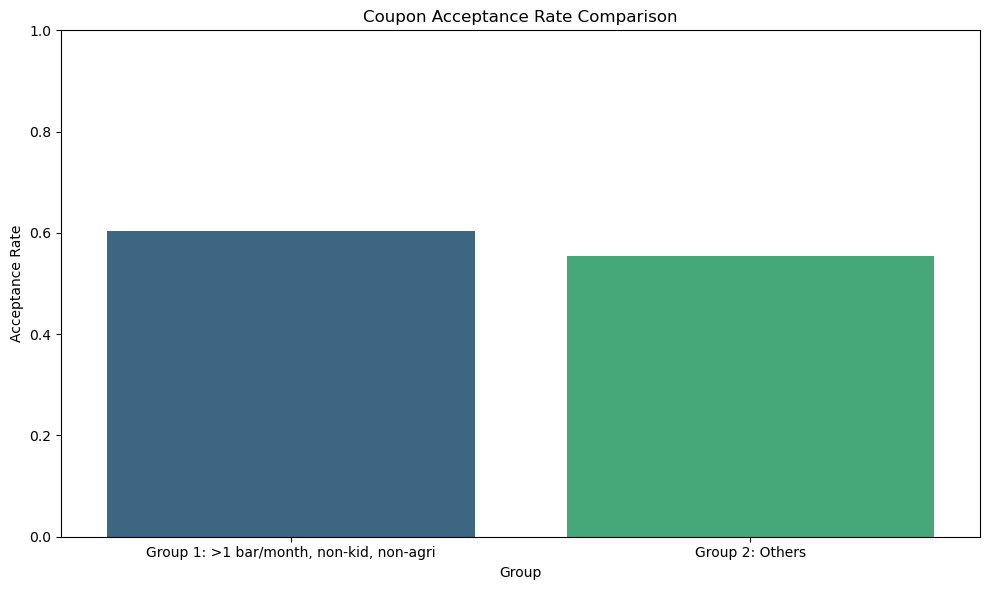

In [63]:
# Define Group 1 using the combined conditions:
# 1. Drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed.
#***NOTE: Renamed Columnn 'Y' to 'coupon_used' in coupons.csv***

firstdf = (df[(df["Bar"]!="never") & (df["age"] != ("below21")) & (df["passanger"]!= "Kid(s)") & (df["maritalStatus"]!= "Widowed")])

#print ("firstdf Error")
# 2. Drivers who go to bars more than once a month and are under the age of 30.

seconddf = (df[df["Bar"].isin(["1~3","less1","4~8","gt8"])& (df["age"].isin(["21" or "26"]))])
#print ("seconddf Error")

#3. Drivers who go to cheap restaurants more than 4 times a month and have an income less than 50K.
#cond3 = df[df["coupon"] ==("Restaurant(<20)") & df["RestaurantLessThan20"] == ("4~8") & (df["income"]. isin(["$37500 - $49999", "$12500 - $24999", "$25000 - $37499"]))]
thirddf = df[df["coupon"].isin(["Restaurant(<20)"]) & df["RestaurantLessThan20"].isin(["4~8"]) & 
(df["income"]. isin(["$37500 - $49999", "$12500 - $24999", "$25000 - $37499"]))]
#print ("thirddf no Error")

firstdf.head()
seconddf.head()
thirddf.head()
# Create a dataframe called "subset_df" with all of data for following critieria
     #go to bars more than once a month, had passengers that were not a kid, and were not widowed OR
     #go to bars more than once a month and are under the age of 30 OR
     #go to cheap restaurants more than 4 times a month and income is less than 50K.
subset_df =pd.concat([firstdf, seconddf, thirddf], axis=0, ignore_index=True)


# Create a dataframe called "Filtered_subset_df" with remaining data from Master Data Frame df after removing data from "subset_df"
Filtered_subset_df = df.drop(subset_df.index).copy()

print("Master DataFrame shape:", df.shape)
print("Subset DataFrame shape:", subset_df.shape)
print("New DataFrame shape:", Filtered_subset_df.shape)


# Calculate acceptance rates (using the mean of the binary coupon_accepted column)
acceptance_rate_group1 = subset_df["coupon_used"].mean()
acceptance_rate_group2 = Filtered_subset_df["coupon_used"].mean()
print(acceptance_rate_group1)
print(acceptance_rate_group2)


# Visualize the comparison with a bar plot.
rates_df = pd.DataFrame({
    "Group": ["Group 1: >1 bar/month, non-kid, non-agri", "Group 2: Others"],
    "Acceptance Rate": [acceptance_rate_group1, acceptance_rate_group2]
})

plt.figure(figsize=(10, 6))
sns.barplot(x="Group", y="Acceptance Rate", hue="Group", data=rates_df, palette="viridis")
plt.title("Coupon Acceptance Rate Comparison")
plt.ylabel("Acceptance Rate")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()








7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
Frequent Bar-Goers:
They might visit bars more often, suggesting a social or nightlife-oriented lifestyle. This behavior could mean that they value discounts or incentives to reduce the cost of their outings.

Demographic Factors:
If we observe differences in age, income, or other demographics, it might be that this group is younger or has a lifestyle that prioritizes social activities. Alternatively, if the income levels are lower, the coupons could be a financial incentive for cost savings.

Lifestyle and Social Habits:
The acceptance of bar coupons might correlate with other lifestyle factors, such as having fewer family responsibilities (which might be reflected in marital status or having kids) or working in industries that are more socially active.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Summary Statistics by Coupon Type:
                    count      mean       std  min  25%  50%  75%  max
coupon                                                                
Restaurant(20-50)  1492.0  0.441019  0.496676  0.0  0.0  0.0  1.0  1.0
Restaurant(<20)    2786.0  0.707107  0.455171  0.0  0.0  1.0  1.0  1.0

Acceptance Rates:
coupon
Restaurant(20-50)    0.441019
Restaurant(<20)      0.707107
Name: coupon_used, dtype: float64


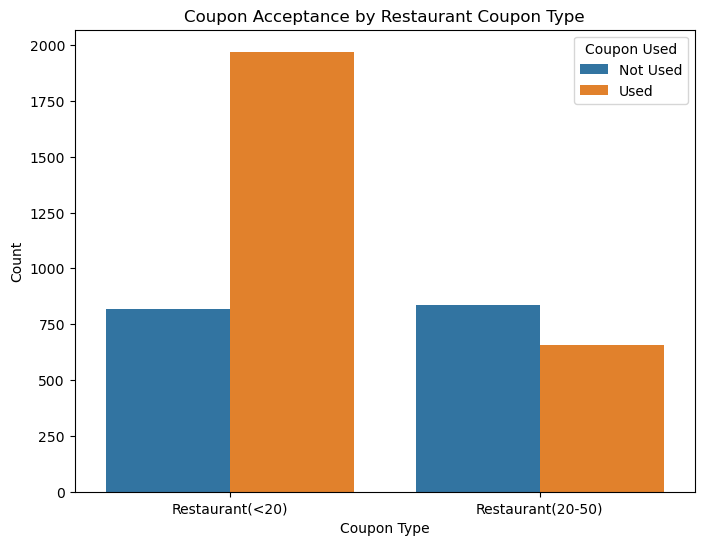

p-value: 7.297717100967607e-65
There is a statistically significant association between coupon type and coupon usage.


In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 1. Load the Data
data = pd.read_csv("data/coupons.csv")

#***NOTE: Renamed Columnn 'Y' to 'coupon_used' in coupons.csv***

# Filter the data to include only the relevant coupon types
coupon_data = data[data['coupon'].isin(['Restaurant(<20)', 'Restaurant(20-50)'])]

# 2. Statistical Summarization
# Summary statistics for coupon_used by coupon type
summary = coupon_data.groupby('coupon')['coupon_used'].describe()
print("Summary Statistics by Coupon Type:")
print(summary)

# Calculate acceptance rate (assuming coupon_used is binary: 1 = accepted, 0 = not accepted)
acceptance_rate = coupon_data.groupby('coupon')['coupon_used'].mean()
print("\nAcceptance Rates:")
print(acceptance_rate)

# 3. Data Visualization
# Count plot to visualize coupon usage by coupon type
plt.figure(figsize=(8,6))
sns.countplot(x='coupon', hue='coupon_used', data=coupon_data)
plt.title("Coupon Acceptance by Restaurant Coupon Type")
plt.xlabel("Coupon Type")
plt.ylabel("Count")
plt.legend(title="Coupon Used", labels=["Not Used", "Used"])
plt.show()

# 4. Statistical Testing
# Create a contingency table for chi-square test (learned about it while googling)
contingency_table = pd.crosstab(coupon_data['coupon'], coupon_data['coupon_used'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print("p-value:", p)

if p < 0.05:
    print("There is a statistically significant association between coupon type and coupon usage.")
else:
    print("There is no statistically significant association between coupon type and coupon usage.")